In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
baseStation = pd.read_csv('../../Dataset/BSinfo.csv')
energy = pd.read_csv('../../Dataset/ECdata.csv')
esmodes = pd.read_csv('../../Dataset/CLdata.csv')

In [4]:
esmodes.drop(['ESMode3','ESMode4','ESMode5'], axis=1, inplace=True)
esmodes

,Time,BS,CellName,load,ESMode1,ESMode2,ESMode6
0,1/1/2023 1:00,B_0,Cell0,0.487936,0.0,0.0,0.0
1,1/1/2023 2:00,B_0,Cell0,0.344468,0.0,0.0,0.0
2,1/1/2023 3:00,B_0,Cell0,0.193766,0.0,0.0,0.0
3,1/1/2023 4:00,B_0,Cell0,0.222383,0.0,0.0,0.0
4,1/1/2023 5:00,B_0,Cell0,0.175436,0.0,0.0,0.0
...,...,...,...,...,...,...,...
125570,1/2/2023 19:00,B_745,Cell3,0.071000,0.0,0.0,0.0
125571,1/2/2023 20:00,B_745,Cell3,0.064962,0.0,0.0,0.0
125572,1/2/2023 21:00,B_745,Cell3,0.081865,0.0,0.0,0.0
125573,1/2/2023 22:00,B_745,Cell3,0.097615,0.0,0.0,0.0


In [16]:
temp_df = pd.merge(esmodes, baseStation, on=['BS','CellName'], how='inner')
temp_df


,Time,BS,CellName,load,ESMode1,ESMode2,ESMode6,RUType,Mode,Frequency,Bandwidth,Antennas,TXpower
0,1/1/2023 1:00,B_0,Cell0,0.487936,0.0,0.0,0.0,Type1,Mode2,365.00,20,4,6.875934
1,1/1/2023 2:00,B_0,Cell0,0.344468,0.0,0.0,0.0,Type1,Mode2,365.00,20,4,6.875934
2,1/1/2023 3:00,B_0,Cell0,0.193766,0.0,0.0,0.0,Type1,Mode2,365.00,20,4,6.875934
3,1/1/2023 4:00,B_0,Cell0,0.222383,0.0,0.0,0.0,Type1,Mode2,365.00,20,4,6.875934
4,1/1/2023 5:00,B_0,Cell0,0.175436,0.0,0.0,0.0,Type1,Mode2,365.00,20,4,6.875934
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125570,1/2/2023 19:00,B_745,Cell3,0.071000,0.0,0.0,0.0,Type1,Mode2,426.98,2,2,6.877429
125571,1/2/2023 20:00,B_745,Cell3,0.064962,0.0,0.0,0.0,Type1,Mode2,426.98,2,2,6.877429
125572,1/2/2023 21:00,B_745,Cell3,0.081865,0.0,0.0,0.0,Type1,Mode2,426.98,2,2,6.877429
125573,1/2/2023 22:00,B_745,Cell3,0.097615,0.0,0.0,0.0,Type1,Mode2,426.98,2,2,6.877429


In [19]:
df = pd.merge(temp_df, energy, on=['Time','BS'], how='outer')
df

,Time,BS,CellName,load,ESMode1,ESMode2,ESMode6,RUType,Mode,Frequency,Bandwidth,Antennas,TXpower,Energy
0,1/1/2023 1:00,B_0,Cell0,0.487936,0.0,0.0,0.000000,Type1,Mode2,365.000,20,4,6.875934,64.275037
1,1/1/2023 2:00,B_0,Cell0,0.344468,0.0,0.0,0.000000,Type1,Mode2,365.000,20,4,6.875934,55.904335
2,1/1/2023 3:00,B_0,Cell0,0.193766,0.0,0.0,0.000000,Type1,Mode2,365.000,20,4,6.875934,57.698057
3,1/1/2023 4:00,B_0,Cell0,0.222383,0.0,0.0,0.000000,Type1,Mode2,365.000,20,4,6.875934,55.156951
4,1/1/2023 5:00,B_0,Cell0,0.175436,0.0,0.0,0.000000,Type1,Mode2,365.000,20,4,6.875934,56.053812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125570,1/2/2023 19:00,B_1019,Cell0,0.019940,0.0,0.0,0.627736,Type11,Mode1,697.002,10,2,7.086398,NaN
125571,1/2/2023 20:00,B_1019,Cell0,0.019940,0.0,0.0,0.627909,Type11,Mode1,697.002,10,2,7.086398,NaN
125572,1/2/2023 21:00,B_1019,Cell0,0.019940,0.0,0.0,0.627909,Type11,Mode1,697.002,10,2,7.086398,NaN
125573,1/2/2023 22:00,B_1019,Cell0,0.019940,0.0,0.0,0.627909,Type11,Mode1,697.002,10,2,7.086398,NaN


In [22]:
df.isnull().sum()

Time             0
BS               0
CellName         0
load             0
ESMode1          0
ESMode2          0
ESMode6          0
RUType           0
Mode             0
Frequency        0
Bandwidth        0
Antennas         0
TXpower          0
Energy       27491
dtype: int64

In [23]:
df[df['Energy'].isnull()]

,Time,BS,CellName,load,ESMode1,ESMode2,ESMode6,RUType,Mode,Frequency,Bandwidth,Antennas,TXpower,Energy
5,1/1/2023 6:00,B_0,Cell0,0.189872,0.0,0.0,0.000000,Type1,Mode2,365.000,20,4,6.875934,NaN
10,1/1/2023 11:00,B_0,Cell0,0.522096,0.0,0.0,0.000000,Type1,Mode2,365.000,20,4,6.875934,NaN
11,1/1/2023 12:00,B_0,Cell0,0.439968,0.0,0.0,0.000000,Type1,Mode2,365.000,20,4,6.875934,NaN
12,1/1/2023 13:00,B_0,Cell0,0.482723,0.0,0.0,0.000000,Type1,Mode2,365.000,20,4,6.875934,NaN
22,1/1/2023 23:00,B_0,Cell0,0.782511,0.0,0.0,0.000000,Type1,Mode2,365.000,20,4,6.875934,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125570,1/2/2023 19:00,B_1019,Cell0,0.019940,0.0,0.0,0.627736,Type11,Mode1,697.002,10,2,7.086398,NaN
125571,1/2/2023 20:00,B_1019,Cell0,0.019940,0.0,0.0,0.627909,Type11,Mode1,697.002,10,2,7.086398,NaN
125572,1/2/2023 21:00,B_1019,Cell0,0.019940,0.0,0.0,0.627909,Type11,Mode1,697.002,10,2,7.086398,NaN
125573,1/2/2023 22:00,B_1019,Cell0,0.019940,0.0,0.0,0.627909,Type11,Mode1,697.002,10,2,7.086398,NaN


In [24]:
# Try something else later, other than droping, if possible.

df.dropna(inplace=True)
df

,Time,BS,CellName,load,ESMode1,ESMode2,ESMode6,RUType,Mode,Frequency,Bandwidth,Antennas,TXpower,Energy
0,1/1/2023 1:00,B_0,Cell0,0.487936,0.0,0.0,0.000000,Type1,Mode2,365.00,20,4,6.875934,64.275037
1,1/1/2023 2:00,B_0,Cell0,0.344468,0.0,0.0,0.000000,Type1,Mode2,365.00,20,4,6.875934,55.904335
2,1/1/2023 3:00,B_0,Cell0,0.193766,0.0,0.0,0.000000,Type1,Mode2,365.00,20,4,6.875934,57.698057
3,1/1/2023 4:00,B_0,Cell0,0.222383,0.0,0.0,0.000000,Type1,Mode2,365.00,20,4,6.875934,55.156951
4,1/1/2023 5:00,B_0,Cell0,0.175436,0.0,0.0,0.000000,Type1,Mode2,365.00,20,4,6.875934,56.053812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125544,1/2/2023 17:00,B_1018,Cell0,0.087538,0.0,0.0,0.781566,Type5,Mode2,426.98,2,2,7.325859,14.648729
125545,1/2/2023 18:00,B_1018,Cell0,0.082635,0.0,0.0,0.804310,Type5,Mode2,426.98,2,2,7.325859,14.648729
125548,1/2/2023 21:00,B_1018,Cell0,0.055538,0.0,0.0,0.846935,Type5,Mode2,426.98,2,2,7.325859,13.452915
125549,1/2/2023 22:00,B_1018,Cell0,0.058077,0.0,0.0,0.856434,Type5,Mode2,426.98,2,2,7.325859,13.602392


In [25]:
df_backup = df.copy()

In [44]:
df=df_backup.copy()

In [45]:
df['Time'] = pd.to_datetime(df['Time'])
df['BS'] = df['BS'].str.replace('B_', '').astype(int)
df['CellName'] = df['CellName'].str.replace('Cell', '').astype(int)
df['RUType'] = df['RUType'].str.replace('Type', '').astype(int)
df['Mode'] = df['Mode'].str.replace('Mode', '').astype(int)
df

,Time,BS,CellName,load,ESMode1,ESMode2,ESMode6,RUType,Mode,Frequency,Bandwidth,Antennas,TXpower,Energy
0,2023-01-01 01:00:00,0,0,0.487936,0.0,0.0,0.000000,1,2,365.00,20,4,6.875934,64.275037
1,2023-01-01 02:00:00,0,0,0.344468,0.0,0.0,0.000000,1,2,365.00,20,4,6.875934,55.904335
2,2023-01-01 03:00:00,0,0,0.193766,0.0,0.0,0.000000,1,2,365.00,20,4,6.875934,57.698057
3,2023-01-01 04:00:00,0,0,0.222383,0.0,0.0,0.000000,1,2,365.00,20,4,6.875934,55.156951
4,2023-01-01 05:00:00,0,0,0.175436,0.0,0.0,0.000000,1,2,365.00,20,4,6.875934,56.053812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125544,2023-01-02 17:00:00,1018,0,0.087538,0.0,0.0,0.781566,5,2,426.98,2,2,7.325859,14.648729
125545,2023-01-02 18:00:00,1018,0,0.082635,0.0,0.0,0.804310,5,2,426.98,2,2,7.325859,14.648729
125548,2023-01-02 21:00:00,1018,0,0.055538,0.0,0.0,0.846935,5,2,426.98,2,2,7.325859,13.452915
125549,2023-01-02 22:00:00,1018,0,0.058077,0.0,0.0,0.856434,5,2,426.98,2,2,7.325859,13.602392


In [46]:
df = df[df['CellName'] == 0]
df.drop(['CellName'], axis=1, inplace=True)
df

C:\Users\nadil\AppData\Local\Temp\ipykernel_7328\709719012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['CellName'], axis=1, inplace=True)


,Time,BS,load,ESMode1,ESMode2,ESMode6,RUType,Mode,Frequency,Bandwidth,Antennas,TXpower,Energy
0,2023-01-01 01:00:00,0,0.487936,0.0,0.0,0.000000,1,2,365.00,20,4,6.875934,64.275037
1,2023-01-01 02:00:00,0,0.344468,0.0,0.0,0.000000,1,2,365.00,20,4,6.875934,55.904335
2,2023-01-01 03:00:00,0,0.193766,0.0,0.0,0.000000,1,2,365.00,20,4,6.875934,57.698057
3,2023-01-01 04:00:00,0,0.222383,0.0,0.0,0.000000,1,2,365.00,20,4,6.875934,55.156951
4,2023-01-01 05:00:00,0,0.175436,0.0,0.0,0.000000,1,2,365.00,20,4,6.875934,56.053812
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125544,2023-01-02 17:00:00,1018,0.087538,0.0,0.0,0.781566,5,2,426.98,2,2,7.325859,14.648729
125545,2023-01-02 18:00:00,1018,0.082635,0.0,0.0,0.804310,5,2,426.98,2,2,7.325859,14.648729
125548,2023-01-02 21:00:00,1018,0.055538,0.0,0.0,0.846935,5,2,426.98,2,2,7.325859,13.452915
125549,2023-01-02 22:00:00,1018,0.058077,0.0,0.0,0.856434,5,2,426.98,2,2,7.325859,13.602392


In [47]:
df.head(70)

,Time,BS,load,ESMode1,ESMode2,ESMode6,RUType,Mode,Frequency,Bandwidth,Antennas,TXpower,Energy
0,2023-01-01 01:00:00,0,0.487936,0.0,0.0,0.0,1,2,365.0,20,4,6.875934,64.275037
1,2023-01-01 02:00:00,0,0.344468,0.0,0.0,0.0,1,2,365.0,20,4,6.875934,55.904335
2,2023-01-01 03:00:00,0,0.193766,0.0,0.0,0.0,1,2,365.0,20,4,6.875934,57.698057
3,2023-01-01 04:00:00,0,0.222383,0.0,0.0,0.0,1,2,365.0,20,4,6.875934,55.156951
4,2023-01-01 05:00:00,0,0.175436,0.0,0.0,0.0,1,2,365.0,20,4,6.875934,56.053812
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2023-01-04 01:00:00,0,0.502840,0.0,0.0,0.0,1,2,365.0,20,4,6.875934,63.976084
98,2023-01-04 03:00:00,0,0.273872,0.0,0.0,0.0,1,2,365.0,20,4,6.875934,57.698057
100,2023-01-04 06:00:00,0,0.216628,0.0,0.0,0.0,1,2,365.0,20,4,6.875934,56.801196
101,2023-01-04 07:00:00,0,0.217532,0.0,0.0,0.0,1,2,365.0,20,4,6.875934,61.883408


In [51]:
df_train = df[df['Time'] < '2023-01-06']
df_train

,Time,BS,load,ESMode1,ESMode2,ESMode6,RUType,Mode,Frequency,Bandwidth,Antennas,TXpower,Energy
0,2023-01-01 01:00:00,0,0.487936,0.0,0.0,0.000000,1,2,365.00,20,4,6.875934,64.275037
1,2023-01-01 02:00:00,0,0.344468,0.0,0.0,0.000000,1,2,365.00,20,4,6.875934,55.904335
2,2023-01-01 03:00:00,0,0.193766,0.0,0.0,0.000000,1,2,365.00,20,4,6.875934,57.698057
3,2023-01-01 04:00:00,0,0.222383,0.0,0.0,0.000000,1,2,365.00,20,4,6.875934,55.156951
4,2023-01-01 05:00:00,0,0.175436,0.0,0.0,0.000000,1,2,365.00,20,4,6.875934,56.053812
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125544,2023-01-02 17:00:00,1018,0.087538,0.0,0.0,0.781566,5,2,426.98,2,2,7.325859,14.648729
125545,2023-01-02 18:00:00,1018,0.082635,0.0,0.0,0.804310,5,2,426.98,2,2,7.325859,14.648729
125548,2023-01-02 21:00:00,1018,0.055538,0.0,0.0,0.846935,5,2,426.98,2,2,7.325859,13.452915
125549,2023-01-02 22:00:00,1018,0.058077,0.0,0.0,0.856434,5,2,426.98,2,2,7.325859,13.602392


In [49]:
df_test = df[df['Time'] >= '2023-01-06']
df_test

,Time,BS,load,ESMode1,ESMode2,ESMode6,RUType,Mode,Frequency,Bandwidth,Antennas,TXpower,Energy
134,2023-01-06 00:00:00,0,0.653223,0.0,0.0,0.0,1,2,365.0,20,4,6.875934,67.713004
135,2023-01-06 03:00:00,0,0.186117,0.0,0.0,0.0,1,2,365.0,20,4,6.875934,55.605381
136,2023-01-06 04:00:00,0,0.174638,0.0,0.0,0.0,1,2,365.0,20,4,6.875934,52.017937
137,2023-01-06 05:00:00,0,0.119543,0.0,0.0,0.0,1,2,365.0,20,4,6.875934,53.662182
139,2023-01-06 07:00:00,0,0.317245,0.0,0.0,0.0,1,2,365.0,20,4,6.875934,80.866966
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120721,2023-01-07 11:00:00,820,0.396190,0.0,0.0,0.0,1,2,365.0,20,2,6.875934,43.497758
120723,2023-01-07 17:00:00,820,0.618800,0.0,0.0,0.0,1,2,365.0,20,2,6.875934,48.281016
120724,2023-01-07 18:00:00,820,0.694690,0.0,0.0,0.0,1,2,365.0,20,2,6.875934,52.914798
120725,2023-01-07 19:00:00,820,0.788790,0.0,0.0,0.0,1,2,365.0,20,2,6.875934,51.270553


In [63]:
df_train['Time'].max()

Timestamp('2023-01-05 23:00:00')

In [59]:
df_train_plot = df_train[['Time','Energy']]
df_train_plot

,Time,Energy
0,2023-01-01 01:00:00,64.275037
1,2023-01-01 02:00:00,55.904335
2,2023-01-01 03:00:00,57.698057
3,2023-01-01 04:00:00,55.156951
4,2023-01-01 05:00:00,56.053812
...,...,...
125544,2023-01-02 17:00:00,14.648729
125545,2023-01-02 18:00:00,14.648729
125548,2023-01-02 21:00:00,13.452915
125549,2023-01-02 22:00:00,13.602392


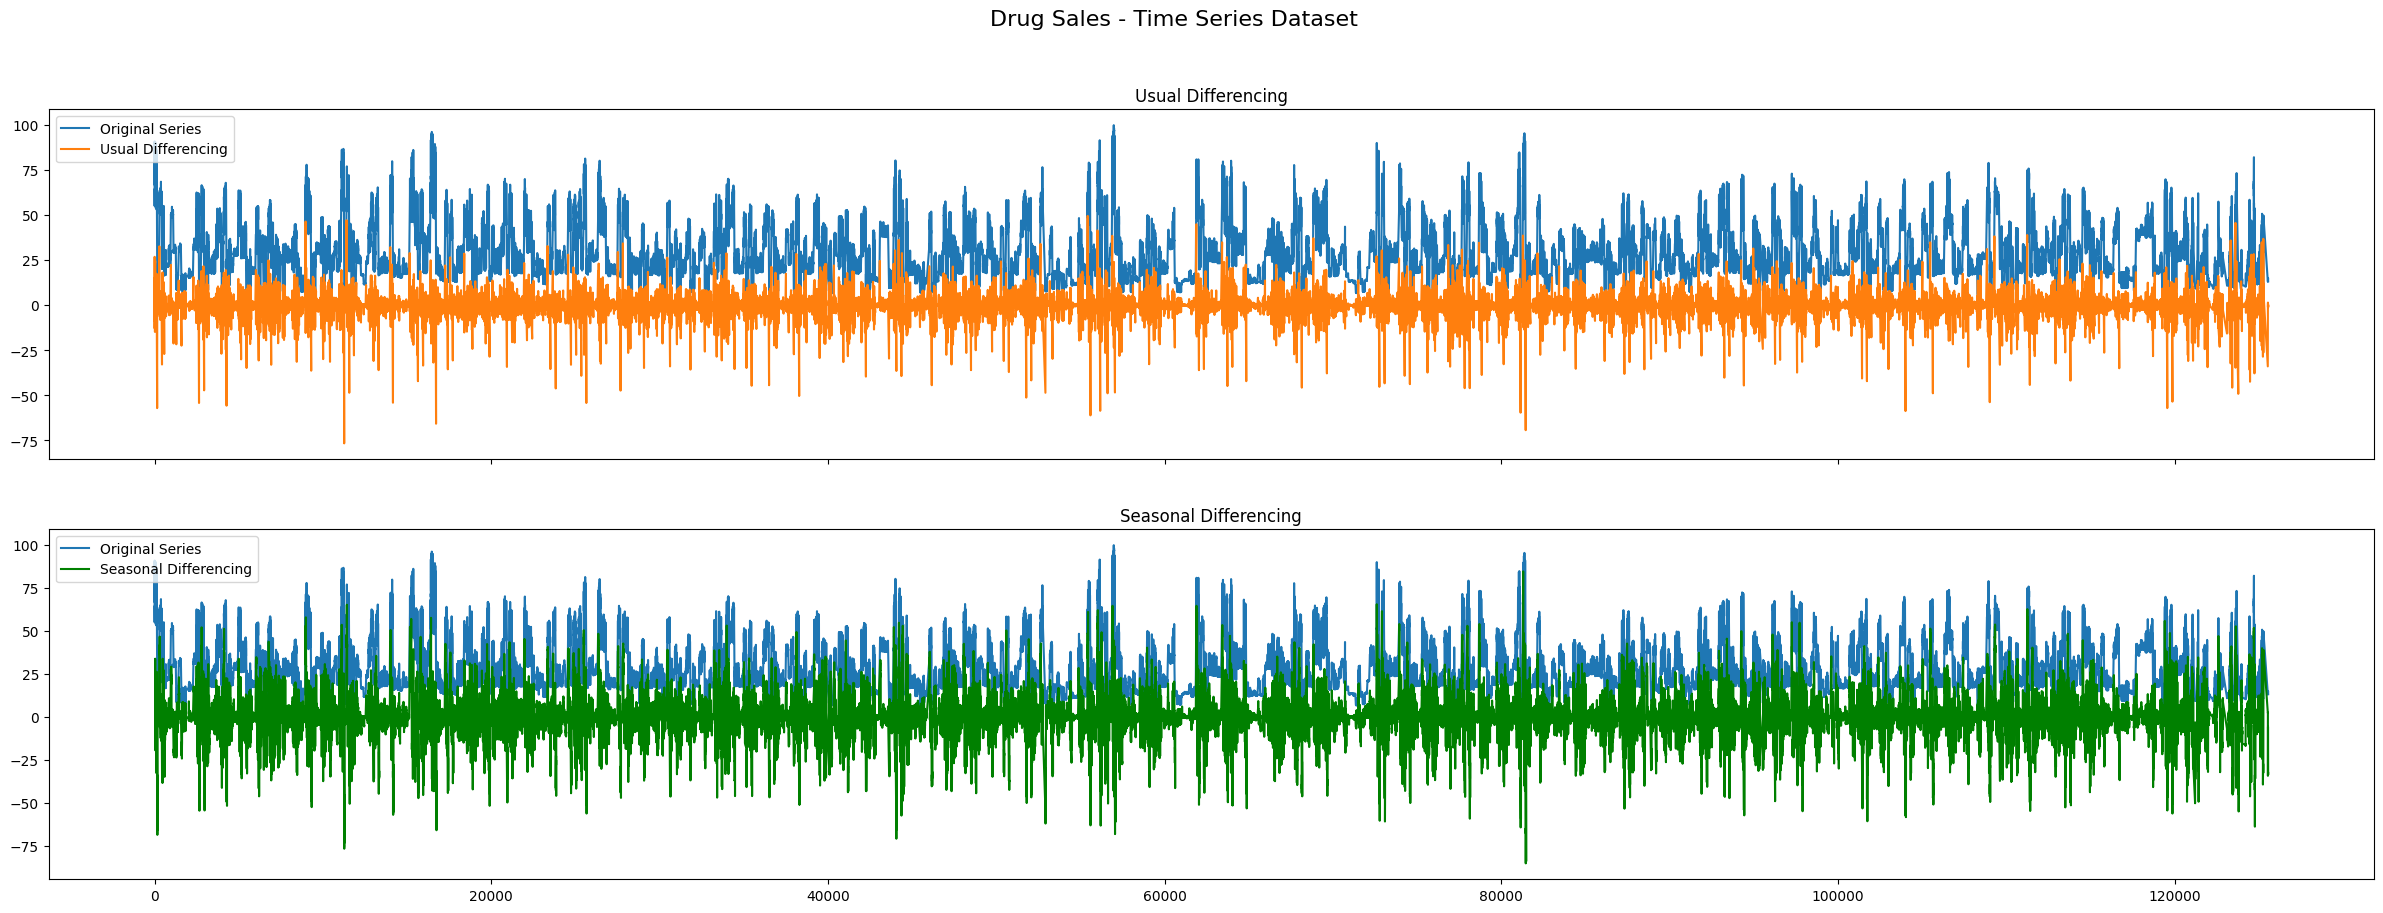

In [88]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(30,10), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(df_train_plot.Energy, label='Original Series')
axes[0].plot(df_train_plot.Energy.diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasonal Differencing
axes[1].plot(df_train_plot.Energy, label='Original Series')
axes[1].plot(df_train_plot.Energy.diff(24), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Drug Sales - Time Series Dataset', fontsize=16)
plt.show()

In [89]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

In [90]:
smodel = pm.auto_arima(df_train_plot, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[float64]'>)

In [91]:
model = ARIMA(df_train_plot, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  
model.summary()

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [ ]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of Drug Sales - Time Series Dataset")
plt.show()

In [94]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df_train_plot, order=(2, 1, 1))

# Fit the model to the training data
# model_fit = model.fit()

# # Forecast future values
# forecast = model_fit.forecast(steps=len(df_train_plot))

# # Print the forecasted values
# print(forecast)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).